In [1]:
import numpy as np, gym, random,gym_gridworlds
import matplotlib.pyplot as plt
import seaborn as sns
env = gym.make('FrozenLake-v0')

/home/karthik/.local/lib/python2.7/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [2]:
from time import time

In [3]:
env.action_space.n

4

In [4]:
def policy_eval(policy, env, discount_factor=1.0, theta=0.00001):
   
    V = np.zeros(env.env.nS)    
    while True:       
        delta = 0        
        for state in range(env.env.nS):  
            val = 0              
            for action,act_prob in enumerate(policy[state]): 
                for prob,next_state,reward,done in env.env.P[state][action]:  
                    val += act_prob * prob * (reward + discount_factor * V[next_state])  
            delta = max(delta, np.abs(val-V[state]))
            V[state] = val
        if delta < theta:  
            break        
    return np.array(V)

# Policy iteration

In [5]:
def policy_iteration(env, policy_eval_fn=policy_eval, discount_factor=1.0):
    
    policy_counter = 0
    def one_step_lookahead(state, V):
       
        A = np.zeros(env.env.nA)
        for a in range(env.env.nA):
            for prob, next_state, reward, done in env.env.P[state][a]:
                A[a] += prob * (reward + discount_factor * V[next_state])
        return A
 
    policy = np.ones([env.env.nS, env.env.nA]) / env.env.nA

    while True:
        start = time()
        policy_counter +=1
       
        curr_pol_val = policy_eval_fn(policy, env, discount_factor)  
        policy_stable = True  
        for state in range(env.env.nS): 
            chosen_act = np.argmax(policy[state])  
            act_values = one_step_lookahead(state,curr_pol_val)  
            best_act = np.argmax(act_values) 
            if chosen_act != best_act:
                policy_stable = False  
            policy[state] = np.eye(env.env.nA)[best_act] 
        if policy_stable:
            return policy, curr_pol_val
        print 'policy_counter',policy_counter
        end = time()
        print 'TIME',end-start
        time_array.append(end-start)
    
  
    return policy



In [7]:
time_array=[]

In [8]:
start = time()
pol_iter_policy= policy_iteration(env,policy_eval,discount_factor=0.99)
end = time()
print 'time-taken in seconds',end-start
pol_iter_policy[0]

policy_counter 1
TIME 0.0175189971924
policy_counter 2
TIME 0.0336718559265
time-taken in seconds 0.0819008350372


array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In [9]:
env.reset()
rewards = []
time_array=[]
cumulative_reward=[]

for episode in range(101):
    state = env.reset()
    #if episode %20 ==0:
      #  env.render()
    step = 0
    done = False
    total_rewards = 0   
    start = time()
    for step in range(200):      
        action = np.argmax(pol_iter_policy[0][state,:])        
        new_state, reward, done, info = env.step(action)        
        total_rewards += reward        
        if done:
            rewards.append(total_rewards)           
            break
        state = new_state
    end = time()
    time_array.append(end-start)
env.close()
print ("Score over time: " +  str(sum(rewards)*1.0/100))

Score over time: 0.77


In [10]:
cumulative_reward_policy =[];iterations_policy=[]
reward_sum = 0
for i in range(len(rewards)):
    reward_sum +=rewards[i]
    cumulative_reward_policy.append(reward_sum)
    iterations_policy.append(i)

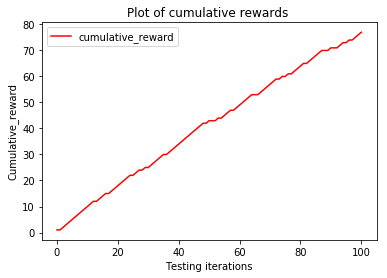

In [11]:
plt.plot(iterations_policy,cumulative_reward_policy,'r',label='cumulative_reward')
plt.xlabel('Testing iterations')
plt.ylabel('Cumulative_reward')
plt.legend()
plt.title('Plot of cumulative rewards ')
plt.savefig('Cumulativerewards_policyiteration_frozenlake.png')
plt.show()

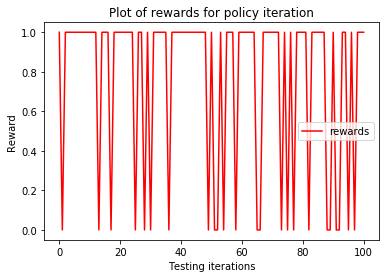

In [12]:
plt.plot(iterations_policy,rewards,'r',label='rewards')
plt.xlabel('Testing iterations')
plt.ylabel('Reward')
plt.title('Plot of rewards for policy iteration')
plt.savefig('reward_policyiteration_frozenlake.png')
plt.legend()
plt.show()

# Value-Iteration

In [13]:
def value_iteration(env, theta=0.0001, discount_factor=1.0):
    value_counter = 0; 
  
    def one_step_lookahead(state, V):
       
        A = np.zeros(env.env.nA)
        for act in range(env.env.nA):
            for prob, next_state, reward, done in env.env.P[state][act]:
                A[act] += prob * (reward + discount_factor*V[next_state])
        return A
    
    V = np.zeros(env.env.nS)
    while True:
        start = time()
        delta = 0  #checker for improvements across states
        value_counter +=1
        for state in range(env.env.nS):           
            act_values = one_step_lookahead(state,V)  #lookahead one step
            best_act_value = np.max(act_values) #get best action value
            delta = max(delta,np.abs(best_act_value - V[state]))  #find max delta across all states
            V[state] = best_act_value  #update value to best action value
        if delta < theta:  #if max improvement less than threshold
            break
        end = time()
       
        print end-start
    policy = np.zeros([env.env.nS, env.env.nA])
    for state in range(env.env.nS):  #for all states, create deterministic policy
        act_val = one_step_lookahead(state,V)
        best_action = np.argmax(act_val)
        policy[state][best_action] = 1
        
    print 'value_counter',value_counter
    
    
    # Implement!
    
    return policy, V

In [14]:
start = time()
val_iter_policy= value_iteration(env,discount_factor=0.99)
end = time()
print 'time-taken in seconds',end-start
#val_iter_policy[0]

0.0019748210907
0.00149703025818
0.00108218193054
0.00109100341797
0.00063681602478
0.00106000900269
0.000969886779785
0.000957012176514
0.000736951828003
0.000752925872803
0.000771045684814
0.000750064849854
0.000765085220337
0.000773906707764
0.000617027282715
0.000627994537354
0.000623941421509
0.000667095184326
0.00069785118103
0.000706911087036
0.000894069671631
0.000517845153809
0.000527143478394
0.000554084777832
0.000563859939575
0.00053596496582
0.000538110733032
0.000550031661987
0.000481843948364
0.00050687789917
0.000492095947266
0.000504016876221
0.000509023666382
0.000518083572388
0.000504970550537
0.000485897064209
0.000454902648926
0.000364780426025
0.000308990478516
0.000324964523315
0.00023889541626
0.000302791595459
0.000285863876343
0.000270843505859
0.00032901763916
0.000195026397705
0.000329971313477
0.000286102294922
0.000312089920044
0.000339031219482
0.000313997268677
0.000274896621704
0.000289916992188
0.000290155410767
0.000274181365967
0.000272989273071
0.00

In [15]:
env.reset()
rewards = []

for episode in range(101):
  #  print rewards
    state = env.reset()
    if episode %20 ==0:
        env.render()
    step = 0
    done = False
    total_rewards = 0
    #print("****************************************************")
    #print("EPISODE ", episode)

    for step in range(200):
        # UNCOMMENT IT IF YOU WANT TO SEE OUR AGENT PLAYING
       # env.render()
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(val_iter_policy[0][state,:])
        
        new_state, reward, done, info = env.step(action)
        
        total_rewards += reward
        
        if done:
            rewards.append(total_rewards)
            #print ("Score", total_rewards)
            break
        state = new_state
env.close()
print ("Score over time: " +  str(sum(rewards)*1.0/101))


SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
Score over time: 0.653465346535


In [16]:
cumulative_reward_value =[];iterations_value=[]
reward_sum = 0
for i in range(len(rewards)):
    reward_sum +=rewards[i]
    cumulative_reward_value.append(reward_sum)
    iterations_value.append(i)

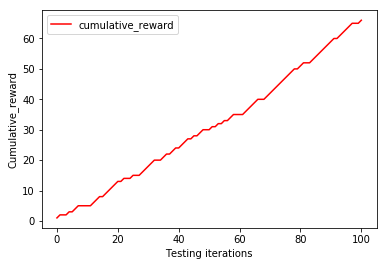

In [17]:
plt.plot(iterations_value,cumulative_reward_value,'r',label='cumulative_reward')
plt.xlabel('Testing iterations')
plt.ylabel('Cumulative_reward')
plt.savefig('Cumulative_reward_value_frozenlake.png')
plt.legend()
plt.show()

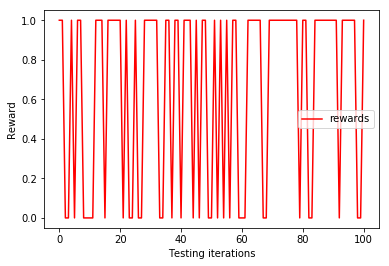

In [18]:
plt.plot(iterations_value,rewards,'r',label='rewards')
plt.xlabel('Testing iterations')
plt.ylabel('Reward')
plt.savefig('rewards_value_frozenlake.png')
plt.legend()
plt.show()

In [19]:
np.array_equiv(pol_iter_policy[0],val_iter_policy[0])

True

# Q-learning

In [33]:
import random

def Q_learning_train(env,alpha,gamma,episodes): 
   
    epsilon = 1.0
    # For plotting metrics
    all_epochs = []
    all_penalties = []
    
    #Initialize Q table of 500 x 6 size (500 states and 6 actions) with all zeroes
    q_table = np.zeros([env.observation_space.n, env.action_space.n])  
    
    for i in range(1, episodes+1):
        state = env.reset()

        epochs, penalties, reward, = 0, 0, 0
        done = False

        while not done:
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample() # Explore action space randomly
            else:
                action = np.argmax(q_table[state]) # Exploit learned values by choosing optimal values

            next_state, reward, done, info = env.step(action) 

            old_value = q_table[state, action]
            next_max = np.max(q_table[next_state])

            new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
            q_table[state, action] = new_value

           # if reward == -10:
            #    penalties += 1

            state = next_state
            epochs += 1
       
        if i % 1000 == 0:
            epsilon *=0.95
            print 'Episode, epsilon %d %f'%(i,epsilon)
    # Start with a random policy
    policy = np.ones([env.env.nS, env.env.nA]) / env.env.nA

    for state in range(env.env.nS):  #for each states
        best_act = np.argmax(q_table[state]) #find best action
        policy[state] = np.eye(env.env.nA)[best_act]  #update 
        
    print("Training finished.\n")
    return policy,q_table

In [34]:

env.reset()
start = time()
Q_learn_pol = Q_learning_train(env,0.2,0.95,500000)
end = time()
print 'time taken', end-start

Episode, epsilon 1000 0.950000
Episode, epsilon 2000 0.902500
Episode, epsilon 3000 0.857375
Episode, epsilon 4000 0.814506
Episode, epsilon 5000 0.773781
Episode, epsilon 6000 0.735092
Episode, epsilon 7000 0.698337
Episode, epsilon 8000 0.663420
Episode, epsilon 9000 0.630249
Episode, epsilon 10000 0.598737
Episode, epsilon 11000 0.568800
Episode, epsilon 12000 0.540360
Episode, epsilon 13000 0.513342
Episode, epsilon 14000 0.487675
Episode, epsilon 15000 0.463291
Episode, epsilon 16000 0.440127
Episode, epsilon 17000 0.418120
Episode, epsilon 18000 0.397214
Episode, epsilon 19000 0.377354
Episode, epsilon 20000 0.358486
Episode, epsilon 21000 0.340562
Episode, epsilon 22000 0.323534
Episode, epsilon 23000 0.307357
Episode, epsilon 24000 0.291989
Episode, epsilon 25000 0.277390
Episode, epsilon 26000 0.263520
Episode, epsilon 27000 0.250344
Episode, epsilon 28000 0.237827
Episode, epsilon 29000 0.225936
Episode, epsilon 30000 0.214639
Episode, epsilon 31000 0.203907
Episode, epsilon 

Episode, epsilon 253000 0.000002
Episode, epsilon 254000 0.000002
Episode, epsilon 255000 0.000002
Episode, epsilon 256000 0.000002
Episode, epsilon 257000 0.000002
Episode, epsilon 258000 0.000002
Episode, epsilon 259000 0.000002
Episode, epsilon 260000 0.000002
Episode, epsilon 261000 0.000002
Episode, epsilon 262000 0.000001
Episode, epsilon 263000 0.000001
Episode, epsilon 264000 0.000001
Episode, epsilon 265000 0.000001
Episode, epsilon 266000 0.000001
Episode, epsilon 267000 0.000001
Episode, epsilon 268000 0.000001
Episode, epsilon 269000 0.000001
Episode, epsilon 270000 0.000001
Episode, epsilon 271000 0.000001
Episode, epsilon 272000 0.000001
Episode, epsilon 273000 0.000001
Episode, epsilon 274000 0.000001
Episode, epsilon 275000 0.000001
Episode, epsilon 276000 0.000001
Episode, epsilon 277000 0.000001
Episode, epsilon 278000 0.000001
Episode, epsilon 279000 0.000001
Episode, epsilon 280000 0.000001
Episode, epsilon 281000 0.000001
Episode, epsilon 282000 0.000001
Episode, e

In [35]:
q_table = Q_learn_pol[0]
env.reset()
rewards = []

for episode in range(100):
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    #print("****************************************************")
    #print("EPISODE ", episode)

    for step in range(200):
        # UNCOMMENT IT IF YOU WANT TO SEE OUR AGENT PLAYING
      #  env.render()
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(q_table[state,:])
        
        new_state, reward, done, info = env.step(action)
        
        total_rewards += reward
        
        if done:
            rewards.append(total_rewards)
            #print ("Score", total_rewards)
            break
        state = new_state
env.close()
print ("Score over time: " +  str(sum(rewards)*1.0/100))

Score over time: 0.72


In [36]:
cumulative_reward_qlearning =[];iterations_qlearning=[]
reward_sum = 0
for i in range(len(rewards)):
    reward_sum +=rewards[i]
    cumulative_reward_qlearning.append(reward_sum)
    iterations_qlearning .append(i)

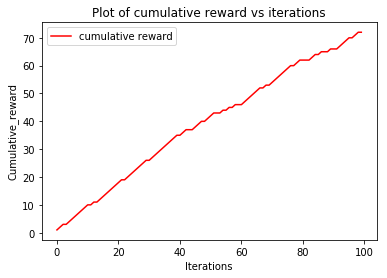

In [37]:
plt.plot(iterations_qlearning,cumulative_reward_qlearning,'r',label='cumulative reward')
plt.xlabel('Iterations')
plt.ylabel('Cumulative_reward')
plt.title('Plot of cumulative reward vs iterations')
plt.legend()
plt.savefig('cumulativefig_qlearning_frozenlake.png')
plt.show()

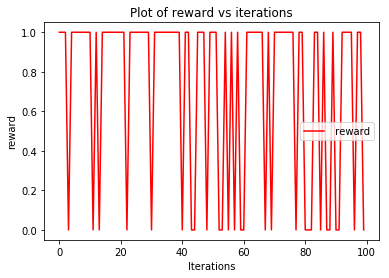

In [38]:
plt.plot(iterations_qlearning,rewards,'r',label=' reward')
plt.xlabel('Iterations')
plt.ylabel('reward')
plt.title('Plot of reward vs iterations')
plt.legend()
plt.savefig('rewards_qlearning_frozenlake.png')
plt.show()

In [46]:
import random

def Q_learning_train(env,alpha,gamma,episodes): 
   

    # For plotting metrics
    all_epochs = []
    all_penalties = []
    
    #Initialize Q table of 500 x 6 size (500 states and 6 actions) with all zeroes
    q_table = np.zeros([env.observation_space.n, env.action_space.n])  
    
    for i in range(1, episodes+1):
        state = env.reset()

        epochs, penalties, reward, = 0, 0, 0
        done = False

        while not done:
            #if random.uniform(0, 1) < epsilon:
             #   action = env.action_space.sample() # Explore action space randomly
            #else:
            action = env.action_space.sample()
           # action = np.argmax(q_table[state]) # Exploit learned values by choosing optimal values

            next_state, reward, done, info = env.step(action) 

            old_value = q_table[state, action]
            next_max = np.max(q_table[next_state])

            new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
            q_table[state, action] = new_value

           # if reward == -10:
            #    penalties += 1

            state = next_state
            epochs += 1

        if i % 50000 == 0:
            print 'Episode %d'%(i)
    # Start with a random policy
    policy = np.ones([env.env.nS, env.env.nA]) / env.env.nA

    for state in range(env.env.nS):  #for each states
        best_act = np.argmax(q_table[state]) #find best action
        policy[state] = np.eye(env.env.nA)[best_act]  #update 
        
    print("Training finished.\n")
    return policy,q_table

In [47]:
start = time()
env.reset()
Q_learn_pol = Q_learning_train(env,0.2,0.95,2000000)
end = time()
print 'time taken', end-start

Episode 50000
Episode 100000
Episode 150000
Episode 200000
Episode 250000
Episode 300000
Episode 350000
Episode 400000
Episode 450000
Episode 500000
Episode 550000
Episode 600000
Episode 650000
Episode 700000
Episode 750000
Episode 800000
Episode 850000
Episode 900000
Episode 950000
Episode 1000000
Episode 1050000
Episode 1100000
Episode 1150000
Episode 1200000
Episode 1250000
Episode 1300000
Episode 1350000
Episode 1400000
Episode 1450000
Episode 1500000
Episode 1550000
Episode 1600000
Episode 1650000
Episode 1700000
Episode 1750000
Episode 1800000
Episode 1850000
Episode 1900000
Episode 1950000
Episode 2000000
Training finished.

time taken 222.118481874


In [48]:
q_table = Q_learn_pol[0]
env.reset()
rewards = []

for episode in range(100):
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    #print("****************************************************")
    #print("EPISODE ", episode)

    for step in range(200):
        # UNCOMMENT IT IF YOU WANT TO SEE OUR AGENT PLAYING
        env.render()
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(q_table[state,:])
        
        new_state, reward, done, info = env.step(action)
        
        total_rewards += reward
        
        if done:
            rewards.append(total_rewards)
            #print ("Score", total_rewards)
            break
        state = new_state
env.close()
print ("Score over time: " +  str(sum(rewards)*1.0/100))


SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Righ

  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)


  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
 

In [49]:
cumulative_reward_qlearning =[];iterations_qlearning=[]
reward_sum = 0
for i in range(len(rewards)):
    reward_sum +=rewards[i]
    cumulative_reward_qlearning.append(reward_sum)
    iterations_qlearning .append(i)

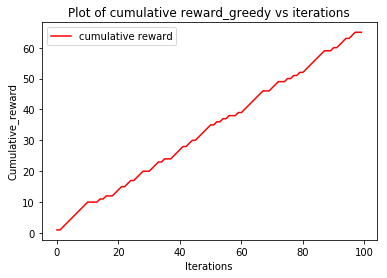

In [50]:
plt.plot(iterations_qlearning,cumulative_reward_qlearning,'r',label='cumulative reward')
plt.xlabel('Iterations')
plt.ylabel('Cumulative_reward')
plt.title('Plot of cumulative reward_greedy vs iterations')
plt.legend()
plt.savefig('cumulativefig_greedy_qlearning_frozenlake.png')
plt.show()

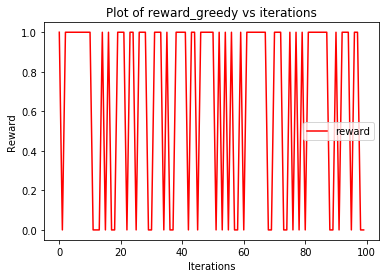

In [51]:
plt.plot(iterations_qlearning,rewards,'r',label='reward')
plt.xlabel('Iterations')
plt.ylabel('Reward')
plt.title('Plot of reward_greedy vs iterations')
plt.legend()
plt.savefig('rewardfig_greedy_qlearning_frozenlake.png')
plt.show()